In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [2]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
trainset_size = x_train.shape[0]
testset_size = x_test.shape[0]
batch_size = 100
steps_per_epoch = np.ceil(trainset_size / batch_size).astype('int')
num_classes = 10
epochs = 50
# input shape: (32, 32, 3)
input_shape = x_train.shape[1:]

print(trainset_size, 'train samples')
print(testset_size, 'test samples')

50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary (one-hot) class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Normalize input numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
data_augmentation = False
drop_out = False

tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  print('Using dropout.')
  model.add(Dropout(0.25))
else:
  print('Not using dropout.')
  
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256, activation='relu'))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

if not data_augmentation:
  print('Not using data augmentation.')
  results = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(rotation_range=5,
                                zoom_range=0.2,
                                horizontal_flip=True)
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    results = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=(x_test, y_test))
results_off_off = results

Not using dropout.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0 

In [6]:
data_augmentation = False
drop_out = True

tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  print('Using dropout.')
  model.add(Dropout(0.25))
else:
  print('Not using dropout.')
  
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256, activation='relu'))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

if not data_augmentation:
  print('Not using data augmentation.')
  results = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(rotation_range=5,
                                zoom_range=0.2,
                                horizontal_flip=True)
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    results = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=(x_test, y_test))
results_off_on = results

Using dropout.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856 

In [7]:
data_augmentation = True
drop_out = False

tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  print('Using dropout.')
  model.add(Dropout(0.25))
else:
  print('Not using dropout.')
  
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256, activation='relu'))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

if not data_augmentation:
  print('Not using data augmentation.')
  results = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(rotation_range=5,
                                zoom_range=0.2,
                                horizontal_flip=True)
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    results = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=(x_test, y_test))
results_on_off = results

Not using dropout.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0 

In [8]:
data_augmentation = True
drop_out = True

tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  print('Using dropout.')
  model.add(Dropout(0.25))
else:
  print('Not using dropout.')
  
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256, activation='relu'))

if drop_out:
  model.add(Dropout(0.25))
  
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

if not data_augmentation:
  print('Not using data augmentation.')
  results = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(rotation_range=5,
                                zoom_range=0.2,
                                horizontal_flip=True)
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    results = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=(x_test, y_test))
results_on_on = results

Using dropout.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856 

In [9]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 126us/step
Test loss: 0.582216313457489
Test accuracy: 0.8008


In [0]:
# Accuracy for Training Dataset
plt_acc_off_off = results_off_off.history["acc"]
plt_acc_off_on = results_off_on.history["acc"]
plt_acc_on_off = results_on_off.history["acc"]
plt_acc_on_on = results_on_on.history["acc"]
# Accuracy for Validation (Test) Dataset
plt_val_acc_off_off = results_off_off.history["val_acc"]
plt_val_acc_off_on = results_off_on.history["val_acc"]
plt_val_acc_on_off = results_on_off.history["val_acc"]
plt_val_acc_on_on = results_on_on.history["val_acc"]

num_epochs = len(plt_acc_off_off)
plt_epoch = np.arange(1, num_epochs+1, 1, dtype=int)

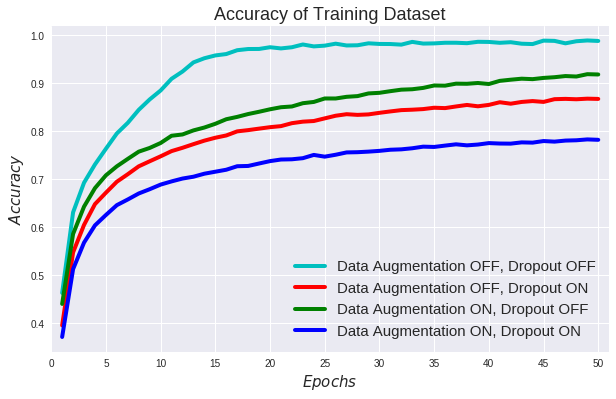

In [15]:
plt.figure(1, figsize=(10, 6))
plt.plot(plt_epoch, plt_acc_off_off, color='c', linewidth=4, label='Data Augmentation OFF, Dropout OFF')
plt.plot(plt_epoch, plt_acc_off_on, color='r', linewidth=4, label='Data Augmentation OFF, Dropout ON')
plt.plot(plt_epoch, plt_acc_on_off, color='g', linewidth=4, label='Data Augmentation ON, Dropout OFF')
plt.plot(plt_epoch, plt_acc_on_on, color='b', linewidth=4, label='Data Augmentation ON, Dropout ON')
plt.xticks(np.arange(0, num_epochs+1, 5, dtype=int))
plt.xlim(0, epochs+1)
plt.legend(loc='best', fontsize=15)
plt.title('Accuracy of Training Dataset', fontsize=18)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Accuracy$', fontsize=15)
plt.grid(True)
plt.show()

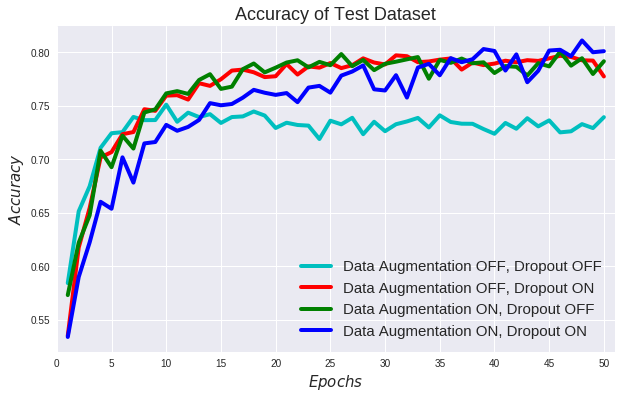

In [16]:
plt.figure(2, figsize=(10, 6))
plt.plot(plt_epoch, plt_val_acc_off_off, color='c', linewidth=4, label='Data Augmentation OFF, Dropout OFF')
plt.plot(plt_epoch, plt_val_acc_off_on, color='r', linewidth=4, label='Data Augmentation OFF, Dropout ON')
plt.plot(plt_epoch, plt_val_acc_on_off, color='g', linewidth=4, label='Data Augmentation ON, Dropout OFF')
plt.plot(plt_epoch, plt_val_acc_on_on, color='b', linewidth=4, label='Data Augmentation ON, Dropout ON')
plt.xticks(np.arange(0, num_epochs+1, 5, dtype=int))
plt.xlim(0, epochs+1)
plt.legend(loc='best', fontsize=15)
plt.title('Accuracy of Test Dataset', fontsize=18)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Accuracy$', fontsize=15)
plt.grid(True)
plt.show()

In [0]:
from google.colab import files

with open('miniproj1-4-f-plt_acc_off_off.bin', 'w') as f:
  np.array(plt_acc_off_off).tofile(f)
files.download('miniproj1-4-f-plt_acc_off_off.bin')

with open('miniproj1-4-f-plt_acc_off_on.bin', 'w') as f:
  np.array(plt_acc_off_on).tofile(f)
files.download('miniproj1-4-f-plt_acc_off_on.bin')

with open('miniproj1-4-f-plt_acc_on_off.bin', 'w') as f:
  np.array(plt_acc_on_off).tofile(f)
files.download('miniproj1-4-f-plt_acc_on_off.bin')

with open('miniproj1-4-f-plt_acc_on_on.bin', 'w') as f:
  np.array(plt_acc_on_on).tofile(f)
files.download('miniproj1-4-f-plt_acc_on_on.bin')
